<a href="https://colab.research.google.com/github/tanyaoley/ml_course_homework/blob/master/08_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Отправьте результат нам в Classroom

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

In [24]:
colab = True 
if colab:
    from google.colab import drive
    drive.mount('/content/drive/')
    wine = pd.read_csv('/content/drive/My Drive/Data/winequality-red.csv.gz', sep=';')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


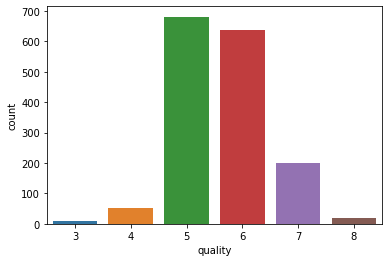

In [25]:
ax = sns.countplot(x=wine["quality"], data=wine)

In [0]:
#оценки на вино выглядят как нормальное распределение(больше средних оценок то есть 5,6)

In [0]:
y = wine['quality']
X = wine.drop(columns = 'quality')

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [0]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [0]:
def cross_val(clf, X_data = X, y_data = y):
  score = cross_val_score(
    estimator=clf,
    X = X_data, 
    y=y_data,
    scoring='accuracy',
    cv= KFold(n_splits= 5,random_state=42,shuffle=True)
  )
  return score.mean()

In [29]:
cross_val(KNeighborsClassifier(n_neighbors=10)).mean()

0.5122198275862069

In [30]:
from sklearn.preprocessing import StandardScaler
cross_val(KNeighborsClassifier(n_neighbors=10), StandardScaler().fit_transform(X), y).mean()


0.5797531347962382

In [31]:
cross_val(RidgeClassifier(random_state=42)).mean()

0.5835384012539185

In [32]:
cross_val(DecisionTreeClassifier(random_state=42)).mean()

0.6178957680250783

In [33]:
cross_val(BaggingClassifier(n_estimators = 100,random_state=42)).mean()

0.6954604231974921

In [34]:
cross_val(BaggingClassifier(n_estimators = 100,random_state=42, max_features = 0.5)).mean()

0.6992123824451411

In [36]:
cross_val(RandomForestClassifier(n_estimators=100)).mean()

0.7029604231974922

### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

In [0]:
1)потому что метрические методы чувствительны к масштабу признаков, исходные признаки имеют разные единицы измерения и масштаб
2)признаки выбираются для узлов так, чтобы уменьшить энтропию и сам масштаб признаков не влияет на результат
3)Бэггинг эффективен на малых выборках,на половине признаков меньше корреляция между одиночными моделями,выше точность
4) KNeighborsClassifier с 10 соседями - нет мастабирования(на результат могут сильно влиять признаки с малым весом)

  

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

In [0]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
X, y = load_digits(return_X_y=True)

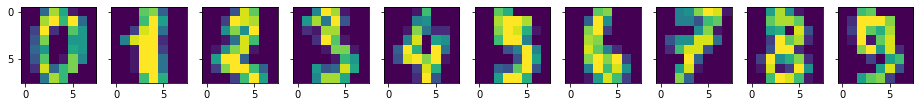

In [40]:
X[0,:].reshape([8,8])
f, axes = plt.subplots(1, 10, sharey=True, figsize=(16,6))
for i in range(10):
  axes[i].imshow(X[i,:].reshape([8,8]))

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [0]:
def cross_val(clf):
  score = cross_val_score(
    estimator=clf,
    X = X, 
    y=y,
    scoring='accuracy',
    cv=10
  )
  return score.mean()

In [17]:
cross_val(DecisionTreeClassifier(random_state=42)).mean()

0.8335909373060211

In [18]:
cross_val(BaggingClassifier(n_estimators = 100,random_state=42)).mean()

0.9276350093109869

In [19]:
cross_val(BaggingClassifier(n_estimators = 100,random_state=42,max_features=int(np.sqrt(X.shape[1])))).mean()

0.9304500310366232

In [22]:
d_tree = DecisionTreeClassifier(random_state=42, max_features=int(np.sqrt(X.shape[1])))
cross_val(BaggingClassifier(base_estimator=d_tree,n_estimators = 100,random_state=42)).mean()

0.9510273122284294

In [42]:
cross_val(RandomForestClassifier(n_estimators = 100,random_state=42)).mean()

0.9493544382371197

### 2.3 В чём разница? (3 балла)

Ответье на вопрос: 

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

In [0]:
ограничение количества признаков в разбиении дерева позволяет сохранить минимальную коррелированность полученных в результате
построения деревьев решений, что улучшает результат бэггинга(в этом случае работат почти как случайный лес)

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

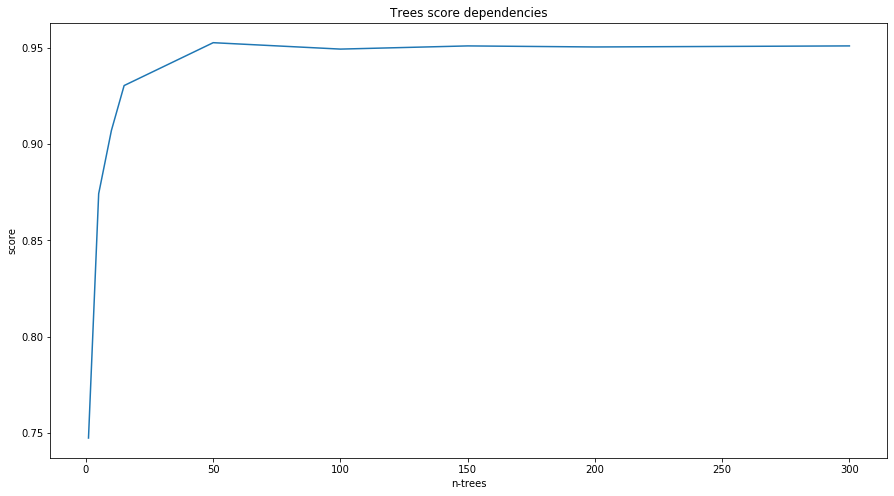

При каком количестве деревьев получается самое хорошее качество: 50 


In [0]:
def plot_rf_trees_score():
    trees = [1,5,10,15,50,100,150,200,300]
    results = []
    max_res = 0
    max_res_tree = 0
    for tree in trees:
        clf = RandomForestClassifier(n_estimators=tree)
        res = cross_val_score( clf, X, y, cv=10).mean()
        results.append(res)
        if res>max_res:
          max_res = res
          max_res_tree = tree
    plt.figure(figsize=(15, 8))
    plt.plot(trees, results)
    plt.xlabel("n-trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
    print("При каком количестве деревьев получается самое хорошее качество: {} ".format(max_res_tree))
plot_rf_trees_score()

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

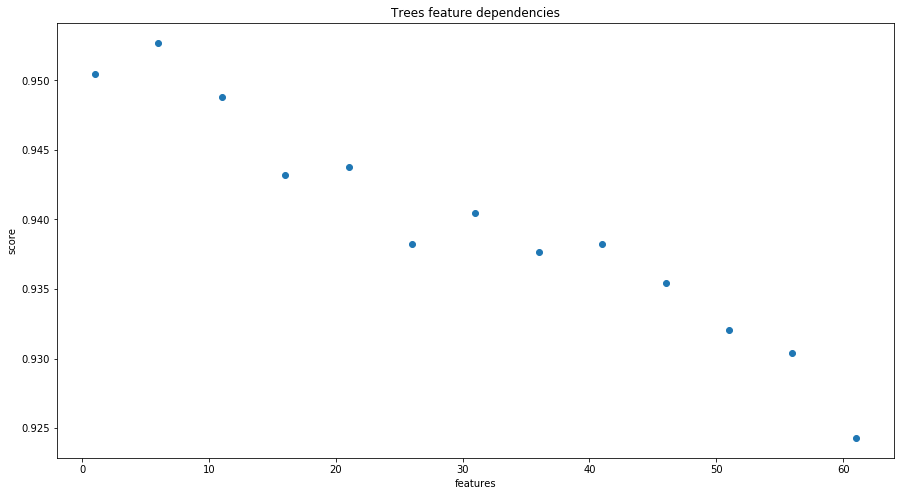

При каком количестве признаков получается самое хорошее качество: 6 


In [0]:
def plot_rf_trees_max_features():
    d = X.shape[1]
    features = [i for i in range(1,64,5)]
    results = []
    max_res_features = 0
    max_res = 0
    for f in features:
        clf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=f)
        res = cross_val_score( clf, X, y, cv=10).mean()
        results.append(res)
        if res>max_res:
          max_res_features = f 
          max_res = res  
    plt.figure(figsize=(15, 8))
    plt.plot(features, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees feature dependencies")
    plt.show()
    print("При каком количестве признаков получается самое хорошее качество: {} ".format(max_res_features))
plot_rf_trees_max_features() 


### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?

С ростом числа деревьев будет уменьшаться скорость вычислений, до определенного критического числа деревьев качество классификации может улучшаться, но  потом не будет большой разницы в результате. 

- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?

Уменьшение признаков может помочь избежать переобучения, сделать дерево более стабильным, случайным 
чем больше признаков тем  деревья становятся более однообразными.


- Как глубина деревьев влияет на качество случайного леса?


При небольшой глубине увеличивается интерпретируемость решающего правила
Чем больше глубина, тем больше точность предсказания. Но время обучения значительно падает.

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)